In [2]:
import IAU_baseline.baseline as base
import xarray as xr
import os
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
file = os.path.join("..", "example", "example_data.nc")
ds = xr.open_dataset(file)
df = ds.to_dataframe().reset_index()
df['datetime'] = pd.to_datetime(df['time'], unit='s', origin='unix')

In [5]:
baseline = base.find_base(func=base.fct.higher, x_val = df["datetime"], y_val = df["HFC-23_C"], y_err = df["HFC-23_std_stdev"] , flag= None,
                        direction='p', verbose=True, plot= False, ctrl_plots=False, limit= 0.1,
                        stop_rel=True, 
                        post_prc_filter=True)
baseline = ["pollution event" if x > 0 else "baseline" for x in baseline[0]]
df["Classification"] = baseline

Found X axis as datetime, converting to fractional year using datetime_to_fractionalyear from toolpac.conv.times
List 'flag' initialized. All elements set to 0.

Limit set to  10.0 %.

X axis first entry seems to contain a large value. Using offset for fitting.
Change rel: 73.63 %
 Value of new stdv: 0.3688347979305149 and stop criterion: 0.1.
 Difference: 1.0297997199873692.
iteration 1: 39 p outliers found.
Change rel: 48.46 %
 Value of new stdv: 0.18649264195768814 and stop criterion: 0.1.
 Difference: 0.17533246284871515.
iteration 2: 160 p outliers found.
Change rel: 17.62 %
 Value of new stdv: 0.15265170691517588 and stop criterion: 0.1.
 Difference: 0.03264889723597267.
iteration 3: 158 p outliers found.
width smaller than mean error of data, using 2*mean(fit_d_mxr)
Change rel: 5.00 %
 Value of new stdv: 0.14437969637625855 and stop criterion: 0.1.
 Difference: 0.007601087012467339.
iteration 4: 0 p outliers found.
Fit result:  [ 3.78203069e+01  2.41660779e+00 -1.22113157e+00 -3

c:\Users\diede\miniforge\envs\mytools\Lib\site-packages\IAU_baseline\baseline.py:104: UserWarning: WARNING: Different occurence of NaN found in y_val and y_err. This may cause issues.

  warnings.warn('WARNING: Different occurence of NaN found in y_val and y_err. This may cause issues.\n')


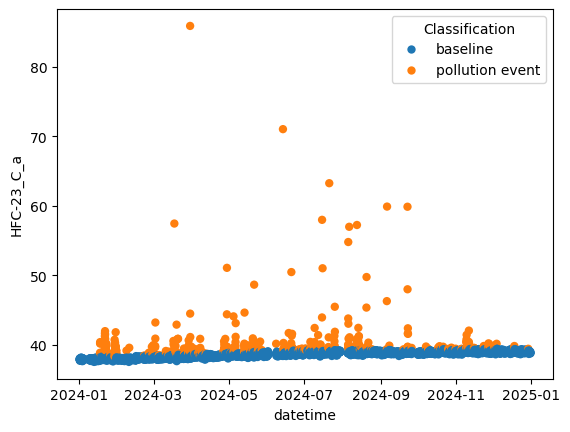

In [6]:
sns.scatterplot(x=df["datetime"], y=df["HFC-23_C_a"], hue=df["Classification"],edgecolor=None, linewidth=0)
plt.show()